<a href="https://colab.research.google.com/github/Myers66/Evdokimov_Graduation_Project/blob/main/%D0%90%D0%BA%D1%82%D1%83%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подготовка данных

In [1]:
# Установка и настройка Kaggle API
!pip install -q --upgrade kaggle

from google.colab import files
import os
import time

uploaded = files.upload()

# Проверка загрузки
if 'kaggle.json' not in uploaded:
    raise FileNotFoundError("❌ Файл kaggle.json не загружен!")

# Настройка прав
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Проверка доступного места
!df -h

# Скачивание датасета с проверками
dataset_name = "sshikamaru/drone-yolo-detection"
zip_file = "drone-yolo-detection.zip"
output_dir = "drone-yolo-detection"

# Удаляем предыдущие попытки (если были)
!rm -f {zip_file}
!rm -rf {output_dir}

print("⏳ Начинаем загрузку датасета...")
start_time = time.time()

try:
    # Скачиваем с принудительным обновлением
    !kaggle datasets download -d {dataset_name} --force
    print("✅ Датсет успешно скачан!")

    # Проверяем размер файла
    file_size = os.path.getsize(zip_file)
    print(f"📦 Размер архива: {file_size/1024/1024:.2f} MB")

    if file_size < 1000000:  # Если файл слишком маленький (скорее всего ошибка)
        raise ValueError("Файл скачан не полностью!")

except Exception as e:
    print(f"❌ Ошибка при скачивании: {e}")
    print("Попробуйте вручную скачать с: https://www.kaggle.com/datasets/sshikamaru/drone-yolo-detection")
    raise

# Распаковка
print("⏳ Распаковываем архив...")
try:
    !unzip -q {zip_file} -d {output_dir}  # -q для тихого режима
    print(f"✅ Датсет распакован в папку: {output_dir}")

    # Проверяем содержимое
    !ls {output_dir} | head -5  # Покажем первые 5 файлов

except:
    print("❌ Ошибка распаковки! Возможно архив повреждён.")
    print("Попробуйте: !unzip -t {zip_file}")  # Проверка целостности

print(f"⏱️ Время выполнения: {time.time()-start_time:.1f} сек")


Saving kaggle.json to kaggle.json
Filesystem      Size  Used Avail Use% Mounted on
overlay         236G   38G  199G  16% /
tmpfs            64M     0   64M   0% /dev
shm              41G     0   41G   0% /dev/shm
/dev/root       2.0G  1.2G  775M  61% /usr/sbin/docker-init
/dev/sda1       242G   67G  176G  28% /opt/bin/.nvidia
tmpfs            42G  116K   42G   1% /var/colab
tmpfs            42G     0   42G   0% /proc/acpi
tmpfs            42G     0   42G   0% /proc/scsi
tmpfs            42G     0   42G   0% /sys/firmware
⏳ Начинаем загрузку датасета...
Dataset URL: https://www.kaggle.com/datasets/sshikamaru/drone-yolo-detection
License(s): Attribution 4.0 International (CC BY 4.0)
 84% 132M/157M [00:00<00:00, 1.38GB/s]
100% 157M/157M [00:00<00:00, 1.38GB/s]
✅ Датсет успешно скачан!
📦 Размер архива: 157.42 MB
⏳ Распаковываем архив...
✅ Датсет распакован в папку: drone-yolo-detection
Database1
yolov2-tiny-voc.cfg
⏱️ Время выполнения: 4.5 сек


In [2]:
import shutil

# Создаем папки images и labels
os.makedirs("drone-dataset/images", exist_ok=True)
os.makedirs("drone-dataset/labels", exist_ok=True)

# Переносим файлы
for file in os.listdir("drone-yolo-detection/Database1/Database1"):
    if file.endswith(".JPEG"):
        shutil.move(
            f"drone-yolo-detection/Database1/Database1/{file}",
            "drone-dataset/images/"
        )
    elif file.endswith(".txt"):
        shutil.move(
            f"drone-yolo-detection/Database1/Database1/{file}",
            "drone-dataset/labels/"
        )




In [3]:
# Проверка содержимого папки images
images_path = "drone-dataset/images/"
labels_path = "drone-dataset/labels/"

# Проверка файлов в папке images
print("Файлы в папке images:")
if os.path.exists(images_path):
    images_files = os.listdir(images_path)
    if images_files:
        print(images_files)  # Вывод списка файлов
        print(f"Количество файлов в папке images: {len(images_files)}")  # Подсчет файлов
    else:
        print("Папка images пуста.")
else:
    print("Папка images не существует.")

# Проверка файлов в папке labels
print("\nФайлы в папке labels:")
if os.path.exists(labels_path):
    labels_files = os.listdir(labels_path)
    if labels_files:
        print(labels_files)  # Вывод списка файлов
        print(f"Количество файлов в папке labels: {len(labels_files)}")  # Подсчет файлов
    else:
        print("Папка labels пуста.")
else:
    print("Папка labels не существует.")


Файлы в папке images:
['name39.JPEG', 'video638.JPEG', 'video18_1093.JPEG', 'video14_73.JPEG', 'video16_655.JPEG', 'video13155.JPEG', 'video18_2139.JPEG', 'video18_256.JPEG', 'video17_155.JPEG', 'video19_917.JPEG', '331.JPEG', 'video215.JPEG', 'video16_488.JPEG', '163.JPEG', 'video18_2573.JPEG', 'video636.JPEG', '318.JPEG', 'video654.JPEG', 'video18_1474.JPEG', 'video16_518.JPEG', 'video18_1111.JPEG', 'video16_716.JPEG', 'video220.JPEG', 'video18_1383.JPEG', 'video15_444.JPEG', '19.JPEG', 'video17_1217.JPEG', 'video18_564.JPEG', 'video16_86.JPEG', 'video19_913.JPEG', 'video18_2404.JPEG', 'video19_1897.JPEG', '22.JPEG', 'video18_1464.JPEG', 'video18_1548.JPEG', 'video16_339.JPEG', 'video18_1739.JPEG', 'video19_1855.JPEG', 'video16_646.JPEG', 'video18_614.JPEG', 'video612.JPEG', 'video18_2160.JPEG', 'video18_1688.JPEG', 'video18_1911.JPEG', 'video19_2487.JPEG', 'video19_2632.JPEG', 'video17_296.JPEG', '320.JPEG', 'video14_139.JPEG', 'video18_1424.JPEG', '146.JPEG', 'video16_541.JPEG', 'v

In [4]:
import yaml

data = {
    'train': '/content/dataset_split/train/',
    'val': '/content/dataset_split/val/',
    'nc': 1,
    'names': ['drone'],
    # Добавляем пути к аннотациям
    'path_annotations': {
        'train': '/content/dataset_split/train/',
        'val': '/content/dataset_split/val/'
    }
}
with open('data.yaml', 'w') as f:
    yaml.dump(data, f)

In [5]:
!pip install split-folders
import random

# Директории
img_dir = "drone-dataset/images"
label_dir = "drone-dataset/labels"
train_img_dir = "dataset_split/train/images"
train_label_dir = "dataset_split/train/labels"
val_img_dir = "dataset_split/val/images"
val_label_dir = "dataset_split/val/labels"
test_img_dir = "dataset_split/test/images"
test_label_dir = "dataset_split/test/labels"

# Создание целевых директорий
os.makedirs(train_img_dir, exist_ok=True)
os.makedirs(train_label_dir, exist_ok=True)
os.makedirs(val_img_dir, exist_ok=True)
os.makedirs(val_label_dir, exist_ok=True)
os.makedirs(test_img_dir, exist_ok=True)
os.makedirs(test_label_dir, exist_ok=True)

# Список всех изображений
img_files = [f for f in os.listdir(img_dir) if f.endswith('.JPEG')]

# Перемешиваем файлы
random.shuffle(img_files)

# Определяем размеры выборок
total_files = len(img_files)
train_size = int(0.7 * total_files)
val_size = int(0.2 * total_files)
test_size = total_files - train_size - val_size

# Разделяем файлы
train_files = img_files[:train_size]
val_files = img_files[train_size:train_size + val_size]
test_files = img_files[train_size + val_size:]

# Функция для перемещения файлов с проверкой существования аннотаций
def move_files(file_list, src_img_dir, dst_img_dir, src_label_dir, dst_label_dir):
    for file in file_list:
        # Проверяем существование аннотации
        label_file = file.replace('.JPEG', '.txt')
        if os.path.exists(os.path.join(src_label_dir, label_file)):
            shutil.move(os.path.join(src_img_dir, file), os.path.join(dst_img_dir, file))
            shutil.move(os.path.join(src_label_dir, label_file), os.path.join(dst_label_dir, label_file))

# Перемещение файлов с аннотациями
move_files(train_files, img_dir, train_img_dir, label_dir, train_label_dir)
move_files(val_files, img_dir, val_img_dir, label_dir, val_label_dir)
move_files(test_files, img_dir, test_img_dir, label_dir, test_label_dir)

print("Разделение завершено.")


Разделение завершено.


In [ ]:
import os
import cv2
import albumentations as A
import matplotlib.pyplot as plt

# Параметры аугментации
augmentation = A.Compose([
    A.RandomBrightnessContrast(p=0.2),
    A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=0.3),
    A.GaussianBlur(blur_limit=(3, 7), p=0.3),
    A.Resize(height=640, width=640)
])

def augment_image(image):
    # Применяем аугментацию
    augmented = augmentation(image=image)
    augmented_image = augmented['image']
    return augmented_image

# Функция для аугментации изображений
def augment_and_save_files(file_list, src_img_dir, dst_img_dir, src_label_dir, dst_label_dir, augmented_images_list):

    step = 10  # берём каждое 10-е изображение
    for i in range(0, len(file_list), step):
        # Проверяем, что индекс не выходит за пределы списка
        if i >= len(file_list):
            break

        # Читаем изображение и аннотацию
        file = file_list[i]
        img_path = os.path.join(src_img_dir, file)
        label_file = file.replace('.JPEG', '.txt')
        label_path = os.path.join(src_label_dir, label_file)

        # Проверка существования файла изображения
        if not os.path.exists(img_path):
            continue

        # Проверка существования файла аннотации
        if not os.path.exists(label_path):
            continue

        # Загружаем изображение
        image = cv2.imread(img_path)
        if image is None:
            continue

        # Аугментация
        augmented_image = augment_image(image)

        # Сохраняем аугментированные файлы
        new_img_name = file.replace('.JPEG', '_augmented.JPEG')
        new_label_name = label_file.replace('.txt', '_augmented.txt')

        cv2.imwrite(os.path.join(dst_img_dir, new_img_name), augmented_image)
        with open(os.path.join(dst_label_dir, new_label_name), 'w') as f:
            # Сохраняем аннотацию как есть
            with open(label_path, 'r') as orig_label:
                f.write(orig_label.read())

        # Сохраняем аугментированное изображение в список для вывода
        augmented_images_list.append(augmented_image)

# Список для хранения аугментированных изображений
augmented_images_list = []

# Теперь вызываем функцию аугментации для каждой выборки
augment_and_save_files(train_files, train_img_dir, train_img_dir, train_label_dir, train_label_dir, augmented_images_list)
augment_and_save_files(val_files, val_img_dir, val_img_dir, val_label_dir, val_label_dir, augmented_images_list)
augment_and_save_files(test_files, test_img_dir, test_img_dir, test_label_dir, test_label_dir, augmented_images_list)

print("Аугментация завершена.")

# Выводим 5 аугментированных изображений
num_images_to_show = min(5, len(augmented_images_list))  # Ограничиваем количество изображений до 5 или до длины списка
plt.figure(figsize=(20, 10))
for i in range(num_images_to_show):
    plt.subplot(1, 5, i + 1)  # 1 строка, 5 колонок
    plt.imshow(cv2.cvtColor(augmented_images_list[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f'Augmented Image {i + 1}')
plt.tight_layout()
plt.show()


In [6]:
import os

# Указываем пути к директориям
img_dir = "dataset_split/train/images"
label_dir = "dataset_split/train/labels"

# Получаем списки файлов
img_files = [f for f in os.listdir(img_dir) if f.endswith('.JPEG')]
label_files = [f for f in os.listdir(label_dir) if f.endswith('.txt')]

# Подсчитываем количество файлов
num_images = len(img_files)
num_labels = len(label_files)

# Выводим результаты
print(f"Количество изображений: {num_images}")
print(f"Количество аннотаций: {num_labels}")

# Проверка на отсутствие аннотаций
missing_labels = []
for img in img_files:
    label_file = img.replace('.JPEG', '.txt')
    if label_file not in label_files:
        missing_labels.append(img)

# Выводим отсутствующие аннотации
if missing_labels:
    print(f"Отсутствующие аннотации для изображений: {missing_labels}")
else:
    print("Все изображения имеют соответствующие аннотации.")


Количество изображений: 2807
Количество аннотаций: 2807
Все изображения имеют соответствующие аннотации.


In [7]:
import os

# Папки с изображениями и аннотациями
img_dir = "dataset_split/train/images"
label_dir = "dataset_split/train/labels"

# Получаем списки файлов
img_files = [f for f in os.listdir(img_dir) if f.endswith('.JPEG')]
label_files = [f for f in os.listdir(label_dir) if f.endswith('.txt')]

# Преобразование имен файлов в название без расширения для удобства сравнения
img_filenames = [f.replace('.JPEG', '') for f in img_files]
label_filenames = [f.replace('.txt', '') for f in label_files]

# Проверяем наличие меток для каждого изображения
missing_labels = []
for img_filename in img_filenames:
    if img_filename not in label_filenames:
        missing_labels.append(img_filename + '.txt')

# Отладочный вывод
print("Изображения:", img_filenames)
print("Аннотации:", label_filenames)

# Результаты
if missing_labels:
    print("Отсутствующие аннотации для следующих файлов:")
    for label in missing_labels:
        print(label)
else:
    print("Все аннотации на месте.")


Изображения: ['video638', 'video18_1093', 'video14_73', 'video16_655', 'video13155', 'video18_256', 'video17_155', '331', 'video215', 'video16_488', '163', 'video18_2573', 'video636', 'video18_1474', 'video16_518', 'video18_1111', 'video16_716', 'video220', 'video15_444', 'video17_1217', 'video18_564', 'video19_913', 'video18_2404', 'video19_1897', '22', 'video18_1464', 'video18_1548', 'video18_1739', 'video19_1855', 'video18_614', 'video612', 'video18_2160', 'video18_1688', 'video18_1911', 'video19_2487', 'video19_2632', 'video17_296', '320', 'video14_139', 'video18_1424', '146', 'video16_541', 'video9195', 'video18_1596', 'video17_777', 'video16_709', '230', 'video17_1046', 'video18_2112', 'video18_1343', 'video16_89', 'video18_2023', 'video15_446', 'video14_37', 'video18_2945', 'video17_123', 'video18_1924', 'video18_2001', 'video16_532', 'video18_1871', '135', '137', 'video18_1261', 'video18_1241', 'video9227', 'video17_113', 'video18_1745', 'video18_693', 'video9241', '236', 'vide

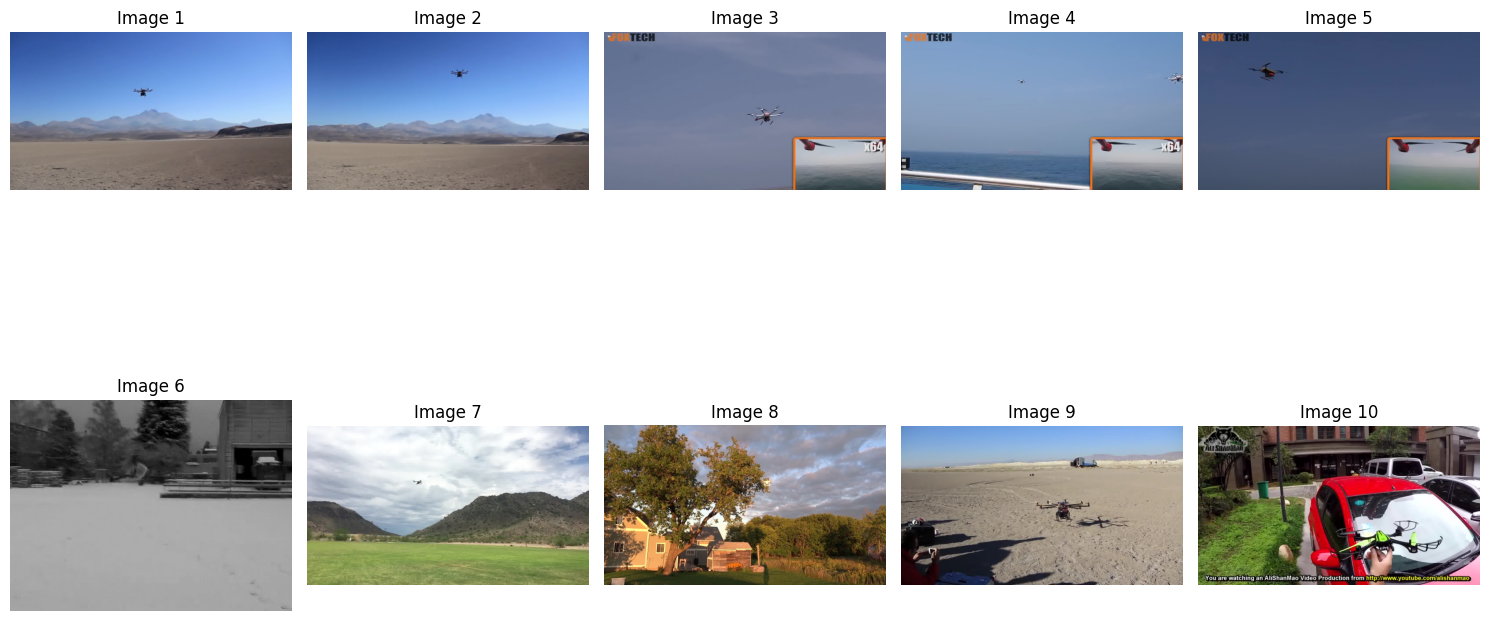

In [8]:
import random
import matplotlib.pyplot as plt
import cv2

# Папка с изображениями
images_folder = 'dataset_split/train/images/'

# Получаем список всех изображений в папке
image_files = [f for f in os.listdir(images_folder) if f.endswith('.JPEG')]

# Выбираем 10 случайных изображений
sample_images = random.sample(image_files, 10)

# Установка фигуры для отображения
plt.figure(figsize=(15, 10))

for i, image_file in enumerate(sample_images):
    # Загружаем изображение
    img_path = os.path.join(images_folder, image_file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Конвертация в RGB

    # Отображение изображения
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Image {i + 1}')

plt.tight_layout()
plt.show()


In [9]:
import os
import pandas as pd

# Папка с данными
base_dir = 'dataset_split'

# Функция для подсчета файлов
def count_files(dir_path, extension):
    return len([f for f in os.listdir(dir_path) if f.endswith(extension)])

# Сбор данных о датасете
data = {
    'Split': ['Train', 'Validation', 'Test'],
    'Images Count': [],
    'Labels Count': []
}

# Получение информации о каждом наборе данных
for split in ['train', 'val', 'test']:
    images_dir = os.path.join(base_dir, split, 'images')
    labels_dir = os.path.join(base_dir, split, 'labels')

    # Подсчитываем изображения и аннотации
    image_count = count_files(images_dir, ".JPEG")   # Подсчет изображений
    label_count = count_files(labels_dir, ".txt")  # Подсчет аннотаций

    data['Images Count'].append(image_count)
    data['Labels Count'].append(label_count)

# Создание DataFrame
df = pd.DataFrame(data)

# Вывод таблицы
print(df)


        Split  Images Count  Labels Count
0       Train          2807          2807
1  Validation           802           802
2        Test           401           401


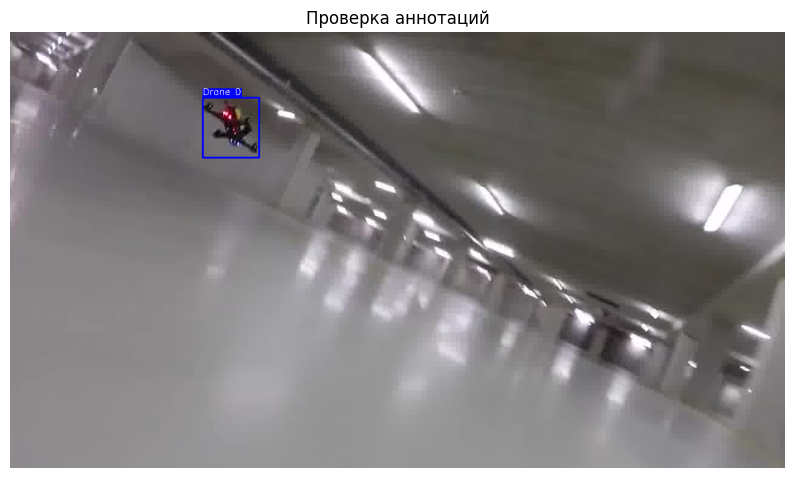

In [11]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Директории с изображениями и аннотациями
img_dir = '/content/dataset_split/test/images'
label_dir = '/content/dataset_split/test/labels'

# Получаем все файлы изображений (предполагаем, что они имеют расширение .jpg)
img_files = [f for f in os.listdir(img_dir) if f.endswith('.JPEG')]

# Случайный выбор изображения
if not img_files:
    raise FileNotFoundError("В директории изображений нет файлов.")

random_img_file = random.choice(img_files)
img_path = os.path.join(img_dir, random_img_file)

# Путь к аннотации
label_path = os.path.join(label_dir, random_img_file.replace('.JPEG', '.txt'))

# Проверка существования файла изображения
if not os.path.exists(img_path):
    raise FileNotFoundError(f"Файл изображения не найден: {img_path}")

# Загрузка изображения
img = cv2.imread(img_path)

# Проверка, загрузилось ли изображение
if img is None:
    raise ValueError(f"Не удалось загрузить изображение: {img_path}")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Конвертация в RGB для matplotlib
h, w = img.shape[:2]  # Получаем высоту и ширину изображения

# Чтение аннотаций YOLO
if not os.path.exists(label_path):
    raise FileNotFoundError(f"Файл аннотации не найден: {label_path}")

with open(label_path, 'r') as f:
    for line in f:
        # Парсинг строки аннотации: класс, x_center, y_center, width, height (нормализованные)
        class_id, x_center, y_center, width, height = map(float, line.split())

        # Конвертация нормализованных координат в абсолютные (пиксели)
        x_center_abs = x_center * w
        y_center_abs = y_center * h
        width_abs = width * w
        height_abs = height * h

        # Расчет координат прямоугольника
        x1 = int(x_center_abs - width_abs / 2)
        y1 = int(y_center_abs - height_abs / 2)
        x2 = int(x_center_abs + width_abs / 2)
        y2 = int(y_center_abs + height_abs / 2)

        # Отрисовка bounding box
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Красный прямоугольник

        # Создаем фон для текста
        text = f'Drone {int(class_id)}'
        text_size = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)[0]
        cv2.rectangle(img, (x1, y1 - 15), (x1 + text_size[0], y1), (0, 0, 255), -1)  # Фон под текстом

        # Отрисовка текста
        cv2.putText(img, text, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)  # Белый текст

# Визуализация с помощью matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.title('Проверка аннотаций')
plt.show()


# Обучение модели

In [12]:
!pip install ultralytics
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 110.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [14]:
model = YOLO('yolov8x.pt')
results = model.train(
    data='data.yaml',
    optimizer='AdamW',
    epochs=50,
    imgsz=640,
    batch=16,
    device='cuda'
)

100%|██████████| 131M/131M [00:00<00:00, 161MB/s]


Ultralytics 8.3.136 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8x.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, p

100%|██████████| 755k/755k [00:00<00:00, 14.0MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              


  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics.nn.modules.conv.Conv             [640, 640, 3, 2]              
  8                  -1  3   6969600  ultralytics.nn.modules.block.C2f             [640, 640, 3, True]           
  9                  -1  1   1025920  ultralytics.nn.modules.block.SPPF            [640, 640, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  3   7379200  ultralytics.nn.modules.block.C2f             [1280

100%|██████████| 5.35M/5.35M [00:00<00:00, 64.7MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 765.2±408.6 MB/s, size: 49.7 KB)


train: Scanning /content/dataset_split/train/labels... 2805 images, 817 backgrounds, 2 corrupt: 100%|██████████| 2807/2807 [00:01<00:00, 1674.19it/s]

train: /content/dataset_split/train/images/video17_295.JPEG: ignoring corrupt image/label: cannot identify image file '/content/dataset_split/train/images/video17_295.JPEG'
train: /content/dataset_split/train/images/video19_1900.JPEG: ignoring corrupt image/label: cannot identify image file '/content/dataset_split/train/images/video19_1900.JPEG'


train: New cache created: /content/dataset_split/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 532.2±448.5 MB/s, size: 23.7 KB)


val: Scanning /content/dataset_split/val/labels... 802 images, 223 backgrounds, 0 corrupt: 100%|██████████| 802/802 [00:00<00:00, 1424.72it/s]

val: New cache created: /content/dataset_split/val/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      11.7G      2.266      2.594      1.939         10        640: 100%|██████████| 176/176 [00:40<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.05it/s]


                   all        802        685   6.67e-05     0.0234    3.4e-05   8.88e-06

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      13.4G      2.155      1.945      1.898          8        640: 100%|██████████| 176/176 [00:37<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.30it/s]

                   all        802        685    0.00562     0.0745      0.004    0.00162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      13.4G      1.989      1.727      1.779         11        640: 100%|██████████| 176/176 [00:37<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.34it/s]

                   all        802        685      0.493      0.228      0.247     0.0971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      13.5G      1.972      1.678      1.784          9        640: 100%|██████████| 176/176 [00:36<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.36it/s]

                   all        802        685      0.614      0.572      0.588      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      14.2G      1.912      1.562      1.736          8        640: 100%|██████████| 176/176 [00:36<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.45it/s]

                   all        802        685      0.657      0.384        0.5      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      14.2G      1.828       1.44      1.642         10        640: 100%|██████████| 176/176 [00:36<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.35it/s]

                   all        802        685      0.754      0.688      0.752      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      14.3G      1.818       1.45      1.642          6        640: 100%|██████████| 176/176 [00:36<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.38it/s]

                   all        802        685      0.752      0.591      0.698      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      14.3G       1.81      1.439      1.616         12        640: 100%|██████████| 176/176 [00:36<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.40it/s]

                   all        802        685      0.664      0.469      0.569      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50        15G      1.806      1.388      1.629          8        640: 100%|██████████| 176/176 [00:36<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.27it/s]

                   all        802        685      0.542      0.669      0.546      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      15.6G      1.761      1.323       1.59          5        640: 100%|██████████| 176/176 [00:36<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.26it/s]

                   all        802        685      0.676      0.572      0.632      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      15.7G      1.773      1.305      1.606          7        640: 100%|██████████| 176/176 [00:36<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.30it/s]

                   all        802        685      0.766       0.72      0.763      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      16.4G       1.76      1.284      1.573         14        640: 100%|██████████| 176/176 [00:36<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.34it/s]

                   all        802        685        0.7      0.619      0.681      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      16.4G      1.731      1.218       1.54         10        640: 100%|██████████| 176/176 [00:36<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.29it/s]

                   all        802        685      0.808      0.749      0.812      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      16.5G      1.724      1.205      1.532          8        640: 100%|██████████| 176/176 [00:36<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.25it/s]

                   all        802        685      0.653      0.591      0.663       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      17.7G      1.698      1.171      1.552         11        640: 100%|██████████| 176/176 [00:36<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.38it/s]

                   all        802        685      0.845      0.787      0.849      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      17.7G      1.683      1.166      1.549         10        640: 100%|██████████| 176/176 [00:36<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.41it/s]

                   all        802        685      0.733      0.737      0.716      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      18.4G      1.671      1.134      1.512          5        640: 100%|██████████| 176/176 [00:36<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.31it/s]

                   all        802        685      0.825      0.835      0.865      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      18.4G      1.665      1.144      1.535         10        640: 100%|██████████| 176/176 [00:36<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.24it/s]

                   all        802        685      0.797       0.75      0.835      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      19.1G      1.641      1.129      1.523          5        640: 100%|██████████| 176/176 [00:36<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.35it/s]

                   all        802        685      0.809      0.859      0.867       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      19.2G      1.682      1.148      1.525         11        640: 100%|██████████| 176/176 [00:36<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.35it/s]

                   all        802        685      0.688      0.634      0.717      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      12.3G      1.659      1.083      1.506          8        640: 100%|██████████| 176/176 [00:36<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.47it/s]

                   all        802        685      0.776       0.85      0.827      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      12.3G      1.635      1.057      1.498          6        640: 100%|██████████| 176/176 [00:37<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.39it/s]

                   all        802        685      0.839      0.842      0.864      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      12.3G      1.648      1.055      1.506         11        640: 100%|██████████| 176/176 [00:36<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.39it/s]

                   all        802        685      0.785      0.867      0.825      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      12.7G       1.62      1.039       1.49          5        640: 100%|██████████| 176/176 [00:36<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.41it/s]

                   all        802        685       0.81      0.841      0.871      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      13.1G      1.609      1.026      1.473          6        640: 100%|██████████| 176/176 [00:36<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.24it/s]

                   all        802        685      0.764      0.847       0.81      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      13.3G      1.592     0.9987      1.459          9        640: 100%|██████████| 176/176 [00:36<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.43it/s]

                   all        802        685      0.856      0.876      0.901      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50        14G      1.587      1.015       1.47          9        640: 100%|██████████| 176/176 [00:36<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.32it/s]

                   all        802        685      0.732      0.765      0.823      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50        14G      1.587     0.9925      1.445          8        640: 100%|██████████| 176/176 [00:36<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.34it/s]

                   all        802        685      0.799      0.801      0.851      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      14.7G      1.575     0.9749      1.449         10        640: 100%|██████████| 176/176 [00:36<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.41it/s]

                   all        802        685      0.815      0.858      0.858      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      14.8G      1.582     0.9798      1.455          7        640: 100%|██████████| 176/176 [00:36<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.36it/s]

                   all        802        685      0.866       0.82      0.873      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      15.5G      1.561     0.9913       1.45          7        640: 100%|██████████| 176/176 [00:36<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.38it/s]

                   all        802        685       0.83      0.883      0.888      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      15.6G      1.564     0.9557      1.444          5        640: 100%|██████████| 176/176 [00:36<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.33it/s]

                   all        802        685      0.759      0.766      0.798      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50        16G      1.535     0.9435      1.436          6        640: 100%|██████████| 176/176 [00:36<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.42it/s]

                   all        802        685      0.853      0.872      0.903      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      16.5G      1.549     0.9408       1.43         12        640: 100%|██████████| 176/176 [00:36<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.38it/s]

                   all        802        685       0.86      0.858      0.901      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      16.7G      1.529     0.9366      1.431          5        640: 100%|██████████| 176/176 [00:36<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.39it/s]

                   all        802        685      0.867      0.861      0.901      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      17.2G      1.523     0.9198      1.429          5        640: 100%|██████████| 176/176 [00:36<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.45it/s]

                   all        802        685      0.842      0.882        0.9      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      17.7G      1.522     0.9089      1.419         10        640: 100%|██████████| 176/176 [00:36<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.37it/s]

                   all        802        685       0.83      0.886      0.898      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      17.9G      1.496     0.8868      1.389          9        640: 100%|██████████| 176/176 [00:36<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.38it/s]

                   all        802        685      0.798      0.861      0.877      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      18.4G       1.49     0.8864      1.409          7        640: 100%|██████████| 176/176 [00:36<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.41it/s]

                   all        802        685      0.872      0.873      0.911      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      18.8G      1.489     0.8818      1.386         12        640: 100%|██████████| 176/176 [00:36<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.37it/s]

                   all        802        685      0.852      0.883      0.915       0.49


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      19.1G      1.486     0.8233      1.428          4        640: 100%|██████████| 176/176 [00:37<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.32it/s]

                   all        802        685       0.84      0.885      0.898      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      19.5G      1.467     0.8201      1.424          6        640: 100%|██████████| 176/176 [00:36<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.40it/s]

                   all        802        685      0.819      0.869      0.885      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      20.1G       1.45     0.7902      1.403          3        640: 100%|██████████| 176/176 [00:36<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.38it/s]

                   all        802        685      0.853       0.89      0.907      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      12.7G       1.45     0.7763      1.402          3        640: 100%|██████████| 176/176 [00:36<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.40it/s]

                   all        802        685      0.866      0.874      0.906      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      12.7G      1.445     0.7867      1.401          5        640: 100%|██████████| 176/176 [00:36<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.38it/s]

                   all        802        685      0.852      0.899      0.894      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      12.7G      1.424     0.7775      1.393          5        640: 100%|██████████| 176/176 [00:36<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.38it/s]

                   all        802        685      0.858      0.893      0.913      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      12.7G      1.433     0.7525      1.403          2        640: 100%|██████████| 176/176 [00:36<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.39it/s]

                   all        802        685      0.871      0.888      0.908      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      13.1G      1.411     0.7389      1.374          4        640: 100%|██████████| 176/176 [00:36<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.42it/s]

                   all        802        685      0.853      0.896      0.916       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      13.6G      1.413     0.7416      1.382          5        640: 100%|██████████| 176/176 [00:36<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.45it/s]

                   all        802        685      0.846      0.901      0.912      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      13.7G      1.389     0.7307      1.364          4        640: 100%|██████████| 176/176 [00:36<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.48it/s]

                   all        802        685      0.857      0.891      0.906      0.506



50 epochs completed in 0.592 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.136 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 112 layers, 68,124,531 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.71it/s]


                   all        802        685      0.853      0.896      0.915      0.509
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train


# Результаты обучения

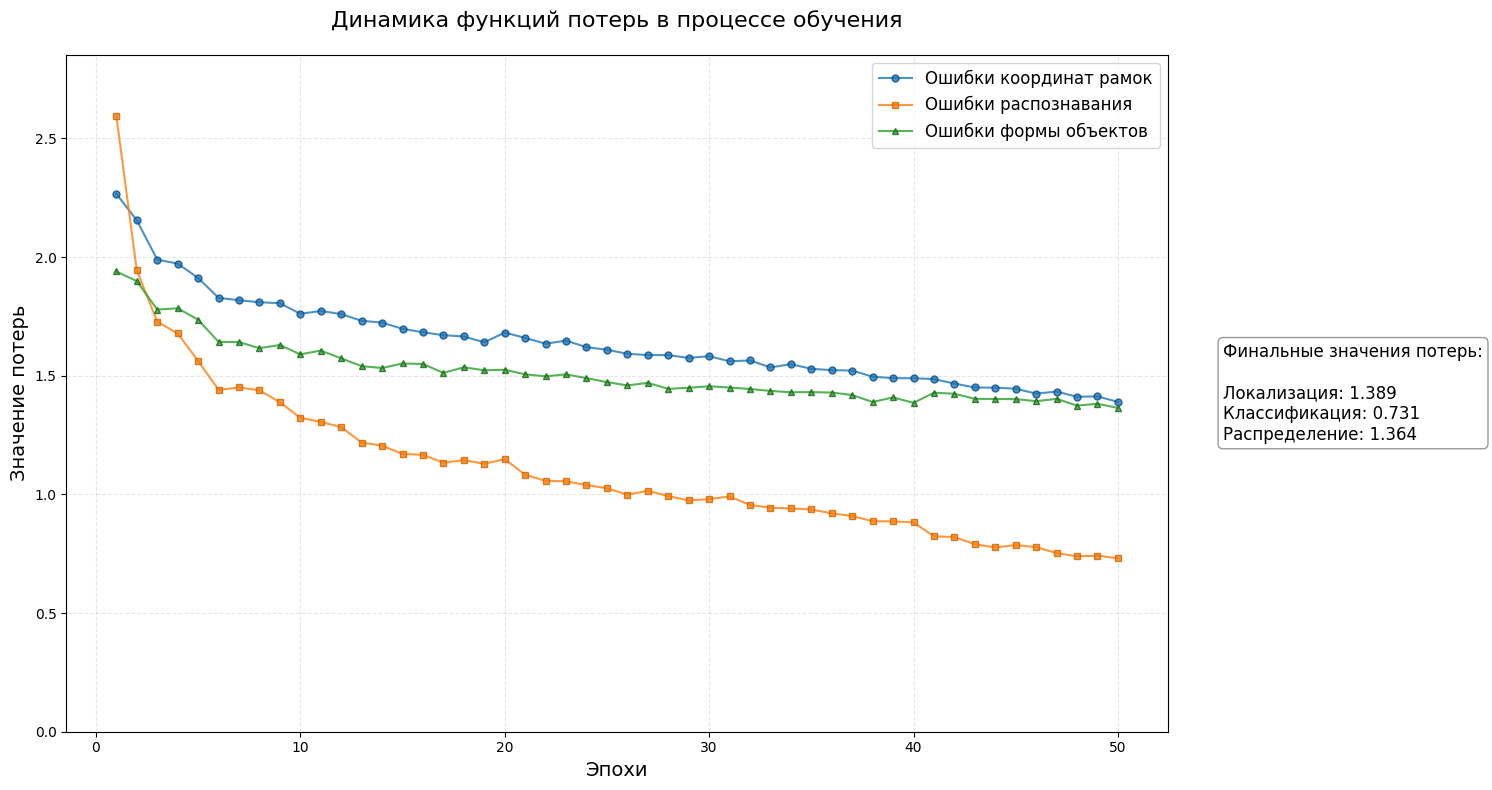

In [94]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from glob import glob

# Находим последний файл с логами обучения
log_files = glob('runs/detect/train*/results.csv')
if not log_files:
    raise FileNotFoundError("Не найдены файлы логов обучения. Убедитесь, что обучение завершилось успешно.")

latest_log = sorted(log_files)[-1]  # Берем последний файл

# Читаем CSV с логами
df = pd.read_csv(latest_log)

# Проверка наличия нужных столбцов
required_columns = ['epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise ValueError(f"Отсутствуют необходимые столбцы: {', '.join(missing_columns)}")

# Подготовка графика
plt.figure(figsize=(15, 8))  # Увеличили ширину для места справа

# Графики для различных функций потерь с предопределенными цветами
loss_plots = {
    'train/box_loss': {
        'label': 'Ошибки координат рамок',
        'color': '#1f77b4',
        'marker': 'o',
        'edgecolor': '#0a4b8c'
    },
    'train/cls_loss': {
        'label': 'Ошибки распознавания',
        'color': '#ff7f0e',
        'marker': 's',
        'edgecolor': '#cc6600'
    },
    'train/dfl_loss': {
        'label': 'Ошибки формы объектов',
        'color': '#2ca02c',
        'marker': '^',
        'edgecolor': '#1a661a'
    }
}

for col, style in loss_plots.items():
    plt.plot(df['epoch'], df[col],
             label=style['label'],
             color=style['color'],
             linestyle='-',
             marker=style['marker'],
             markersize=5,
             markeredgecolor=style['edgecolor'],
             markerfacecolor=style['color'],
             linewidth=1.5,
             alpha=0.8)

# Настройки графика
plt.title('Динамика функций потерь в процессе обучения', fontsize=16, pad=20)
plt.xlabel('Эпохи', fontsize=14)
plt.ylabel('Значение потерь', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)

# Автоматическое масштабирование оси Y
min_loss = min(df[['train/box_loss', 'train/cls_loss', 'train/dfl_loss']].min())
max_loss = max(df[['train/box_loss', 'train/cls_loss', 'train/dfl_loss']].max())
plt.ylim(0, max_loss*1.1)


# Получаем финальные значения потерь
last_box = df['train/box_loss'].iloc[-1]
last_cls = df['train/cls_loss'].iloc[-1]
last_dfl = df['train/dfl_loss'].iloc[-1]

# Создаем текстовый блок с финальными значениями справа
loss_text = (f'Финальные значения потерь:\n\n'
             f'Локализация: {last_box:.3f}\n'
             f'Классификация: {last_cls:.3f}\n'
             f'Распределение: {last_dfl:.3f}')

plt.annotate(loss_text,
             xy=(1.05, 0.5),
             xycoords='axes fraction',
             fontsize=12,
             bbox=dict(boxstyle='round', fc='white', ec='gray', alpha=0.8),
             va='center')

# Легенда
plt.legend(fontsize=12, loc='upper right')

# Увеличиваем правое поле для текста
plt.subplots_adjust(right=0.82)

plt.tight_layout()
plt.show()

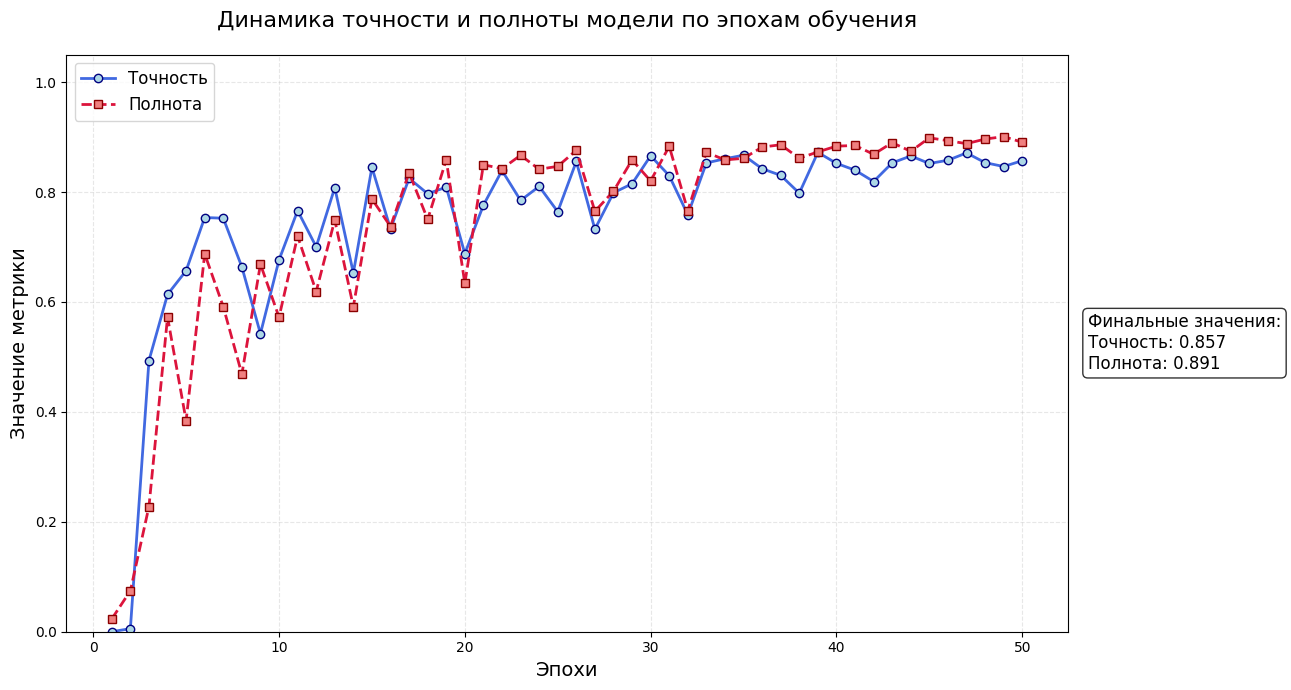

In [87]:
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob

# Находим последний файл с логами обучения
log_files = glob('runs/detect/train*/results.csv')
if not log_files:
    raise FileNotFoundError("Не найдены файлы логов обучения. Убедитесь, что обучение завершилось успешно.")

latest_log = sorted(log_files)[-1]  # Берем последний файл

# Читаем CSV с логами
df = pd.read_csv(latest_log)

# Подготовка графика
plt.figure(figsize=(13, 7))  # Увеличили ширину для места справа

# Построение графиков
plt.plot(df['epoch'], df['metrics/precision(B)'],
         label='Точность',
         color='royalblue',
         linestyle='-',
         marker='o',
         markersize=6,
         markeredgecolor='navy',
         markerfacecolor='lightblue',
         linewidth=2)

plt.plot(df['epoch'], df['metrics/recall(B)'],
         label='Полнота',
         color='crimson',
         linestyle='--',
         marker='s',
         markersize=6,
         markeredgecolor='darkred',
         markerfacecolor='lightcoral',
         linewidth=2)

# Заголовки и метки
plt.title('Динамика точности и полноты модели по эпохам обучения', fontsize=16, pad=20)
plt.xlabel('Эпохи', fontsize=14)
plt.ylabel('Значение метрики', fontsize=14)
plt.ylim(0, 1.05)

# Вычисляем финальные значения
last_precision = df['metrics/precision(B)'].iloc[-1]
last_recall = df['metrics/recall(B)'].iloc[-1]

# Создаем кастомную легенду справа
legend_text = (f'Финальные значения:\n'
               f'Точность: {last_precision:.3f}\n'
               f'Полнота: {last_recall:.3f}')

plt.annotate(legend_text,
             xy=(1.02, 0.5),
             xycoords='axes fraction',
             fontsize=12,
             bbox=dict(boxstyle='round', fc='white', alpha=0.8),
             va='center')

# Основная легенда
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)

# Увеличиваем правое поле для текста
plt.subplots_adjust(right=0.85)

plt.tight_layout()
plt.show()

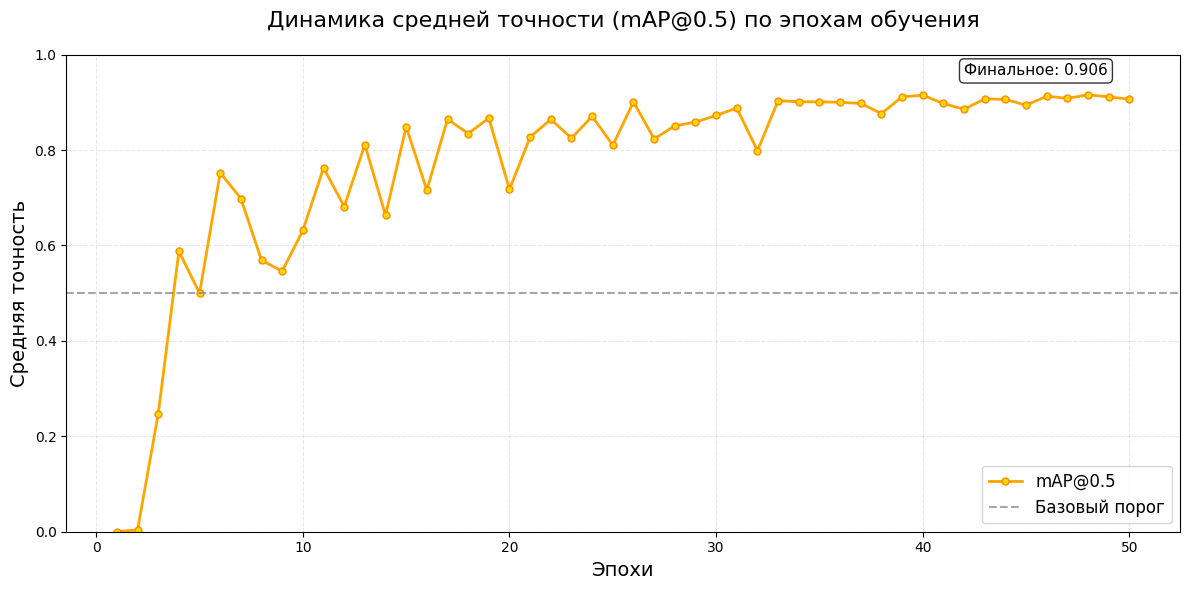

In [89]:
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob

# Находим последний файл с логами обучения
log_files = glob('runs/detect/train*/results.csv')
if not log_files:
    raise FileNotFoundError("Не найдены файлы логов обучения. Убедитесь, что обучение завершилось успешно.")

latest_log = sorted(log_files)[-1]  # Берем последний файл

# Читаем CSV с логами
df = pd.read_csv(latest_log)

# Подготовка графика
plt.figure(figsize=(12, 6))

# Построение графиков для mAP50 с маркерами
plt.plot(df['epoch'], df['metrics/mAP50(B)'],
         label='mAP@0.5',
         color='orange',
         linestyle='-',
         marker='o',
         markersize=5,
         markeredgecolor='darkorange',
         markerfacecolor='gold',
         linewidth=2)

# Заголовки и метки
plt.title('Динамика средней точности (mAP@0.5) по эпохам обучения', fontsize=16, pad=20)
plt.xlabel('Эпохи', fontsize=14)
plt.ylabel('Средняя точность', fontsize=14)
plt.ylim(0, 1)  # Установка пределов по оси Y от 0 до 1

# Горизонтальные линии для ориентиров
plt.axhline(y=0.5, color='grey', linestyle='--', alpha=0.7, linewidth=1.5, label='Базовый порог')

# Находим и отмечаем максимальное значение
max_val = df['metrics/mAP50(B)'].max()
max_epoch = df['metrics/mAP50(B)'].idxmax()


# Добавляем аннотацию последнего значения
last_val = df['metrics/mAP50(B)'].iloc[-1]
plt.annotate(f'Финальное: {last_val:.3f}',
             xy=(len(df)-1, last_val),
             xytext=(len(df)-8, last_val+0.05),
             fontsize=11,
             bbox=dict(boxstyle='round', fc='white', alpha=0.8))

# Легенда и сетка
plt.legend(fontsize=12, loc='lower right')
plt.grid(True, linestyle='--', alpha=0.3)

# Оптимизация отображения
plt.tight_layout()
plt.show()

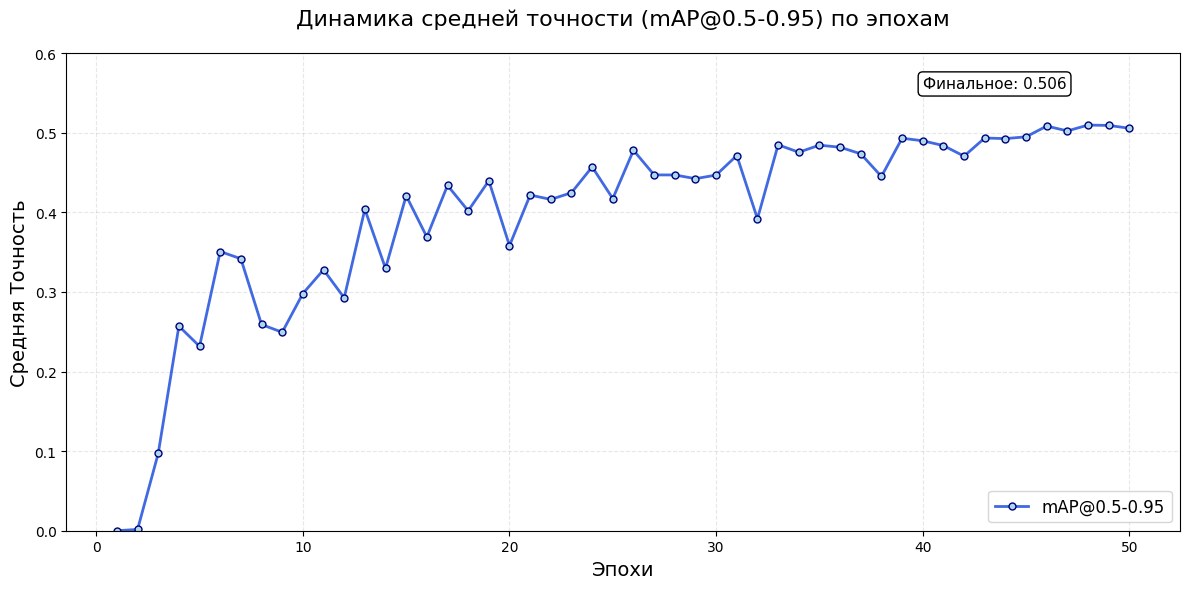

In [88]:
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob

# Находим последний файл с логами обучения
log_files = glob('runs/detect/train*/results.csv')
if not log_files:
    raise FileNotFoundError("Не найдены файлы логов обучения. Убедитесь, что обучение завершилось успешно.")

latest_log = sorted(log_files)[-1]  # Берем последний файл

# Читаем CSV с логами
df = pd.read_csv(latest_log)

# Настройка графика
plt.figure(figsize=(12, 6))

# График для mAP50-95 с маркерами
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'],
         label='mAP@0.5-0.95',
         color='royalblue',
         linewidth=2,
         marker='o',
         markersize=5,
         markeredgecolor='navy',
         markerfacecolor='lightblue')

# Заголовки и подписи
plt.title('Динамика средней точности (mAP@0.5-0.95) по эпохам', fontsize=16, pad=20)
plt.xlabel('Эпохи', fontsize=14)
plt.ylabel('Средняя Точность', fontsize=14)
plt.ylim(0, 0.6)  # Более узкий диапазон для лучшей читаемости

# Находим и отмечаем максимальное значение
max_val = df['metrics/mAP50-95(B)'].max()
max_epoch = df['metrics/mAP50-95(B)'].idxmax()


# Добавляем аннотацию последнего значения
last_val = df['metrics/mAP50-95(B)'].iloc[-1]
plt.annotate(f'Финальное: {last_val:.3f}',
             xy=(len(df)-1, last_val),
             xytext=(len(df)-10, last_val+0.05),
             fontsize=11,
             bbox=dict(boxstyle='round', fc='w'))

# Легенда и сетка
plt.legend(fontsize=12, loc='lower right')
plt.grid(True, linestyle='--', alpha=0.3)

# Оптимизация отображения
plt.tight_layout()
plt.show()

In [20]:
# Дополнительно: вывод таблицы с основными метриками
metrics = df[['epoch', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']]
print("\nОсновные метрики обучения:")
print(metrics.tail(51))  # Показываем последние 50 эпох


Основные метрики обучения:
    epoch  metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0       1               0.00007            0.02336           0.00003   
1       2               0.00562            0.07445           0.00400   
2       3               0.49342            0.22774           0.24735   
3       4               0.61359            0.57226           0.58784   
4       5               0.65684            0.38394           0.49982   
5       6               0.75361            0.68759           0.75234   
6       7               0.75233            0.59124           0.69836   
7       8               0.66368            0.46861           0.56876   
8       9               0.54227            0.66861           0.54615   
9      10               0.67632            0.57226           0.63158   
10     11               0.76611            0.71971           0.76251   
11     12               0.70026            0.61898           0.68148   
12     13               0.80791     

In [21]:
print(df.columns)

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


# Скачивание всех результатов

In [96]:
import shutil
import os

# Пути для сохранения
source_dir = 'runs/detect/train'
target_dir = '/content/drive/MyDrive/yolo_models'

# Создаем целевую папку, если её нет
os.makedirs(target_dir, exist_ok=True)

# Создаем ZIP-архив
shutil.make_archive('/content/training_results', 'zip', source_dir)

# Копируем архив в Google Drive
shutil.move('/content/training_results.zip', os.path.join(target_dir, 'training_results.zip'))

'/content/drive/MyDrive/yolo_models/training_results.zip'

# Скачивание модели в google disk

In [50]:
import shutil
import os

# Путь к обученной модели (best.pt или last.pt)
model_path = "runs/detect/train/weights/best.pt"

# Куда сохранить (Google Drive)
save_path = "/content/drive/MyDrive/yolo_models/best_1.pt"

# Копируем файл
shutil.copy(model_path, save_path)

print(f"Модель сохранена в: {save_path}")

Модель сохранена в: /content/drive/MyDrive/yolo_models/best_1.pt


# Запуск модели в проекте

In [1]:
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.3 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from ultralytics import YOLO

# Загрузка модели
model = YOLO("/content/drive/MyDrive/yolo_models/best_1.pt")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Работа модели в деле

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving ролрол.jpg to ролрол.jpg

image 1/1 /content/ролрол.jpg: 384x640 1 drone, 59.0ms
Speed: 2.6ms preprocess, 59.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


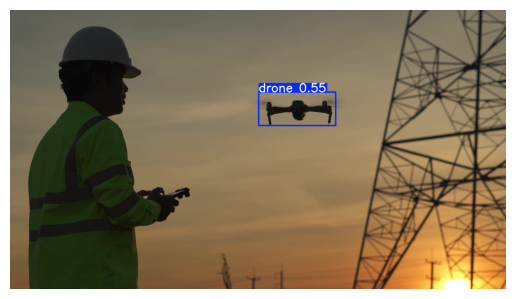

Результат сохранён как result.jpg


In [53]:
import cv2
from google.colab import files
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Подключение Google Drive (если модель там)
from google.colab import drive
drive.mount('/content/drive')

# Загрузка вашей модели
model_path = '/content/drive/MyDrive/yolo_models/best_1.pt'
model = YOLO(model_path)  # загружаем кастомную модель

# Вариант 1: Использовать изображение из датасета
img_path = '/content/dataset_split/test/images/yoto01335.jpg'  # пример

# Вариант 2: Загрузить своё изображение
uploaded = files.upload()
img_path = next(iter(uploaded))  # берём первое загруженное изображение

# Предсказание
results = model.predict(img_path, conf=0.5)  # conf - порог уверенности

# Визуализация
for r in results:
    im_array = r.plot()  # массив с отрисованными bounding boxes
    im = cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB)
    plt.imshow(im)
    plt.axis('off')
    plt.show()

    # Сохранение результата
    output_path = 'result.jpg'
    cv2.imwrite(output_path, im_array)
    print(f"Результат сохранён как {output_path}")

In [ ]:
for result in results:
    boxes = result.boxes.xyxy  # координаты в формате [x1, y1, x2, y2]
    confs = result.boxes.conf   # уверенность
    classes = result.boxes.cls  # класс (должен быть 0, так как у вас один класс)

    for box, conf, cls in zip(boxes, confs, classes):
        print(f"Обнаружен БПЛА с уверенностью {conf:.2f} на координатах {box.tolist()}")

Обнаружен БПЛА с уверенностью 0.84 на координатах [432.857666015625, 158.92562866210938, 1028.572265625, 403.2610168457031]


# Интерфейс

In [5]:
!pip install gradio -q
!pip install ultralytics -q
!pip install opencv-python-headless -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.8 MB/s eta 0:00:00


In [6]:
import gradio as gr
import cv2
from ultralytics import YOLO
import tempfile
import numpy as np
import os
from datetime import datetime

# Загрузка модели
model = YOLO("/content/drive/MyDrive/yolo_models/best_1.pt")

def create_yolo_annotation(detections, img_width, img_height):
    """Создает файл аннотаций в формате YOLO"""
    annotation_file = tempfile.NamedTemporaryFile(delete=False, suffix='.txt')

    with open(annotation_file.name, 'w') as f:
        for det in detections:
            class_id, x_center, y_center, width, height = det
            # Нормализованные координаты с 6 знаками после запятой
            line = f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n"
            f.write(line)

    return annotation_file.name

def process_video(input_video_path, confidence):
    """Функция обработки видео"""
    temp_input = tempfile.NamedTemporaryFile(delete=False, suffix='.mp4')
    temp_output = tempfile.NamedTemporaryFile(delete=False, suffix='.mp4')
    temp_input_path = temp_input.name
    temp_output_path = temp_output.name

    if isinstance(input_video_path, bytes):
        with open(temp_input_path, 'wb') as f:
            f.write(input_video_path)
    else:
        temp_input_path = input_video_path

    cap = cv2.VideoCapture(temp_input_path)
    if not cap.isOpened():
        return None, "Ошибка открытия видео", None, None

    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(temp_output_path, fourcc, fps, (width, height))

    detections = []
    frame_count = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        results = model.predict(frame, conf=confidence, imgsz=640)

        for r in results:
            for box in r.boxes:
                # Получаем координаты в абсолютных значениях
                x1, y1, x2, y2 = map(int, box.xyxy[0].cpu().numpy())
                class_id = int(box.cls[0].cpu().numpy())

                # Конвертируем в YOLO формат (нормализованные координаты центра)
                x_center = ((x1 + x2) / 2) / width
                y_center = ((y1 + y2) / 2) / height
                bbox_width = (x2 - x1) / width
                bbox_height = (y2 - y1) / height

                detections.append([class_id, x_center, y_center, bbox_width, bbox_height])

                # Визуализация (не изменяется)
                cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
                cv2.putText(frame, f"Drone {box.conf[0]:.2f}", (x1, y1-10),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)

        out.write(frame)
        frame_count += 1

    cap.release()
    out.release()

    # Создаем файл аннотаций YOLO
    annotation_path = create_yolo_annotation(detections, width, height)

    report = f"🚁 Всего обнаружено объектов: {len(detections)}"
    return temp_output_path, report, temp_output_path, annotation_path

def detect_media(input_media, confidence, media_type):
    """Универсальная функция обработки"""
    try:
        if media_type == "image":
            if isinstance(input_media, np.ndarray):
                image = input_media.copy()
            else:
                image = np.array(input_media)

            if image.shape[2] == 3:
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            height, width = image.shape[:2]
            results = model.predict(image, conf=confidence)

            detections = []
            for r in results:
                for box in r.boxes:
                    x1, y1, x2, y2 = map(int, box.xyxy[0].cpu().numpy())
                    class_id = int(box.cls[0].cpu().numpy())

                    x_center = ((x1 + x2) / 2) / width
                    y_center = ((y1 + y2) / 2) / height
                    bbox_width = (x2 - x1) / width
                    bbox_height = (y2 - y1) / height

                    detections.append([class_id, x_center, y_center, bbox_width, bbox_height])

                    cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
                    cv2.putText(image, f"Drone {box.conf[0]:.2f}", (x1, y1-10),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)

            temp_img_path = tempfile.mktemp(suffix='.jpg')
            cv2.imwrite(temp_img_path, image)

            annotation_path = create_yolo_annotation(detections, width, height)

            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Измененное сообщение - просто факт обнаружения
            report = "🟢 Дрон обнаружен!" if detections else "🔴 Дроны не обнаружены"
            return image_rgb, report, temp_img_path, annotation_path

        else:
            if input_media is None:
                return None, "❌ Видео не загружено", None, None

            if isinstance(input_media, str):
                video_path = input_media
            else:
                video_path = tempfile.mktemp(suffix='.mp4')
                with open(video_path, 'wb') as f:
                    f.write(input_media)

            output_path, report, _, annotation_path = process_video(video_path, confidence)

            # Модифицируем отчет для видео
            if "обнаружено" in report.lower():
                report = "🟢 Дроны обнаружены в видео!" if int(report.split(":")[1].strip()) > 0 else "🔴 Дроны не обнаружены в видео"

            return output_path, report, output_path, annotation_path

    except Exception as e:
        return None, f"⚠️ Ошибка: {str(e)}", None, None

# Интерфейс Gradio (остается без изменений)
with gr.Blocks(theme=gr.themes.Soft()) as demo:
    gr.Markdown("# 🚁 Детектор дронов 🛩️")

    with gr.Tabs():
        with gr.Tab("Изображение"):
            img_in = gr.Image(label="Загрузите фото")
            img_conf = gr.Slider(0.1, 0.9, value=0.5, label="Порог уверенности")
            img_btn = gr.Button("Анализировать")
            img_out = gr.Image(label="Результат")
            img_report = gr.Textbox(label="Информация")
            with gr.Row():
                img_download = gr.File(label="Скачать изображение")
                img_annotations = gr.File(label="Скачать аннотации YOLO")

        with gr.Tab("Видео"):
            vid_in = gr.Video(label="Загрузите видео")
            vid_conf = gr.Slider(0.1, 0.9, value=0.5, label="Порог уверенности")
            vid_btn = gr.Button("Анализировать")
            vid_out = gr.Video(label="Обработанное видео")
            vid_report = gr.Textbox(label="Статистика")
            with gr.Row():
                vid_download = gr.File(label="Скачать видео")
                vid_annotations = gr.File(label="Скачать аннотации YOLO")

        with gr.Tab("Трансляция"):
            stream_url = gr.Textbox(label="Введите URL трансляции (веб-камеры)")
            stream_conf = gr.Slider(0.1, 0.9, value=0.5, label="Порог уверенности")
            stream_btn = gr.Button("Начать трансляцию")

            # Измененный блок вывода - только для отображения
            stream_output = gr.Image(label="Трансляция с камеры", interactive=False)

            stream_report = gr.Textbox(label="Статус трансляции")
            stream_annotations = gr.File(label="Скачать аннотации YOLO (после завершения)",
                                       visible=False)



    # Обработчики событий
    img_btn.click(
        fn=lambda img, conf: detect_media(img, conf, "image"),
        inputs=[img_in, img_conf],
        outputs=[img_out, img_report, img_download, img_annotations]
    )

    vid_btn.click(
        fn=lambda vid, conf: detect_media(vid, conf, "video"),
        inputs=[vid_in, vid_conf],
        outputs=[vid_out, vid_report, vid_download, vid_annotations]
    )

demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9851ddc1bfdfedad26.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
